momentum contrast for unsupervised visual representation learning

moco属于对比学习的工作，其主要贡献是证明了利用对比学习训练出来的特征提取器能够取得与有监督方式训练出的特征提取器相近甚至更好的结果

instance discimination的pre-task，要想取得好的效果，一般要做到两点：一是字典要足够大，字典里面存储的大多是负样本的特征，这些特征是特征空间的近似或估计，只有字典长度足够长,才能更好的代表原始特征空间，才能用来做对比学习；二是字典里的特征要连续，要具有一致性，需要相同或相似的encoder生成

对比学习的模式通常有3种，如下图所示，有end-to-end的，用两个encoder，同时在线更新参数，字典的长度与mini-batch的长度相同，字典的连续性较好，但必须用较大的batch-size,内存限制较大；有memory bank的，一个encoder，特征的提取是离线的，首先将所有图像的特征离线存储，然后每次训练时采样一个字典长度的特征，更新完参数后生成新的特征，替换被采样的特征，imagenet百万级的数据量占用约500M内存，但特征的连续性不强。还有moco的方式，字典长度是动态变化的，用queue这种数据结构来实现，key-encoder的参数来源于query-encoder，既能保持连续性，又能减小对内存的占用。
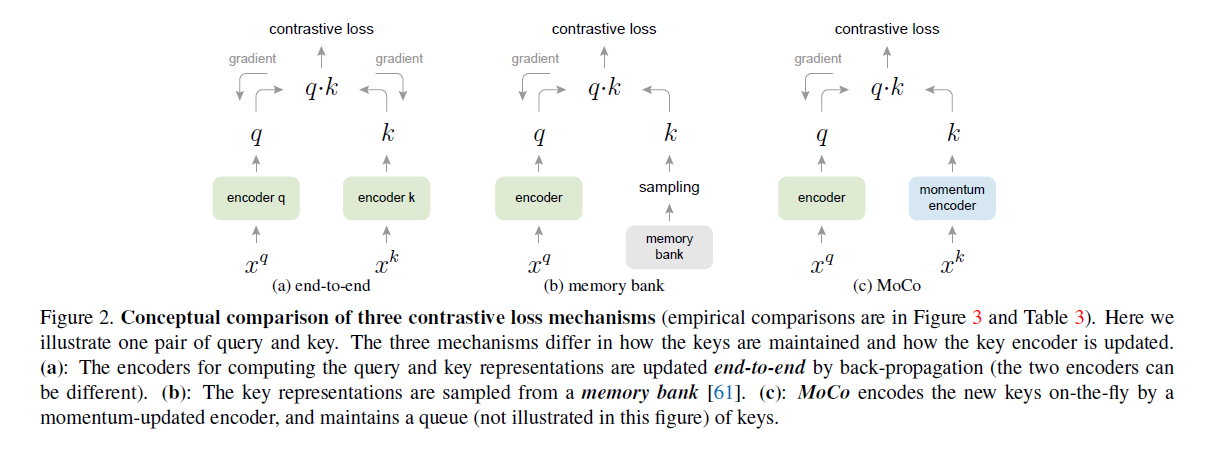

对比学习目前的工作主要集中在两方面，一个是pre-text的工作，即代理任务的设计，另一个是contrastive loss的设计，moco的工作属于loss的改进

moco用instance discrimination的方式构建代理任务，如下图所示：
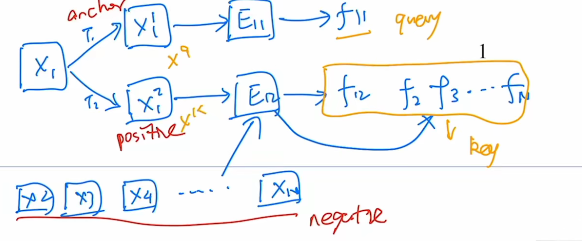

loss选取infoNCE:
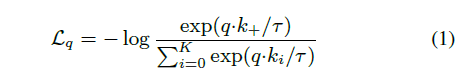

moco的主要贡献是以下两点：<br/>
1)动态更新字典：利用queue,遵循FIFO原则，将当前mini-batch计算出的key替换最开始进入queue的key。字典放入内存，当前mini-batch的key在显存计算<br/>
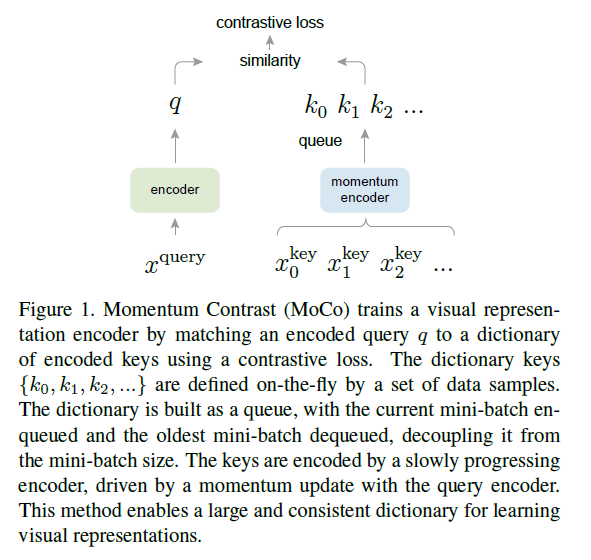

2)momentum constract: 更新key encoder的参数是用momentum方法，即滑动平均，保持特征的连续性：
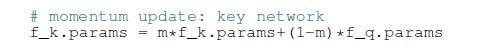

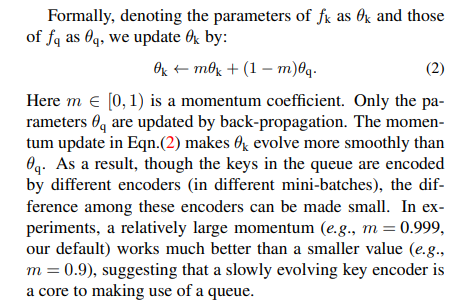

需要强调的是，moco的最本质的效用是在下游任务的应用，能够在下游任务取得与监督方法相近甚至优于监督方法的效果。

moco的伪代码如下：
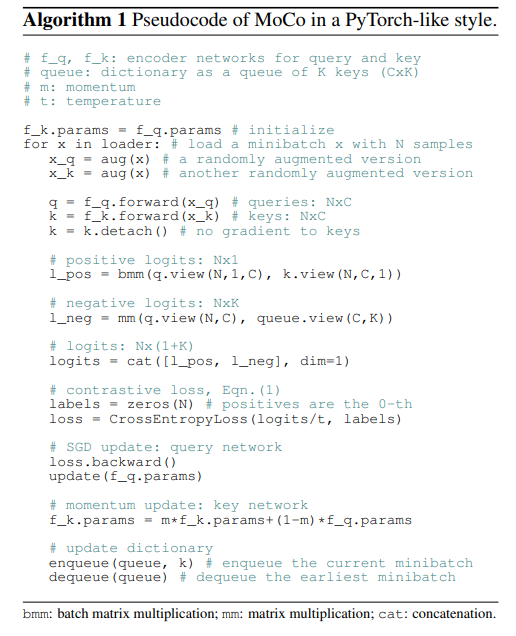